#**KERAS MNIST CNN**

## Creating a model based on MNIST Dataset of Handwritten Digits

### Step 1: Load the MNIST dataset

In [5]:
from keras.datasets import mnist

#Loads the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


### Step 2A: examine the size of the dataset and image dimensions (good practice)

In [6]:
print('Initial shape or dimension of the training data: ', x_train.shape)
print('Number of samples in the training data: ', len(x_train))
print('Number of labels in the training data: ', len(y_train))

print('\nInitial shape or dimension of the test data: ', x_test.shape)
print('Number of samples in the test data: ', len(x_test))
print('Number of labels in the test data: ', len(y_test))

Initial shape or dimension of the training data:  (60000, 28, 28)
Number of samples in the training data:  60000
Number of labels in the training data:  60000

Initial shape or dimension of the test data:  (10000, 28, 28)
Number of samples in the test data:  10000
Number of labels in the test data:  10000


### Step 2B: examine some images in the dataset

#### 1 - Using Matplotlib

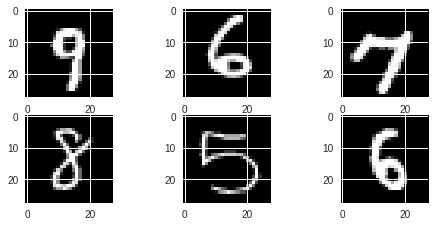

In [7]:
import matplotlib.pyplot as plt
import numpy as np

subplot = 331

for i in range(0,6):
  plt.subplot(subplot)
  random_num = np.random.randint(0, len(x_train))
  plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))
  subplot += 1

### Step 3: prepare the dataset for training

#### 1- Preparing the input data -> Transforming and Normalizing

In [8]:
# Number of rows and columns of a sample
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# Getting the right dimension for Keras
# Adding a 4th dimension representing color chanel -> Grayscale = 1
# Transforming (60000, 28, 28) to (60000, 28, 28, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# Transforming image type and normalizing data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

input_shape = (img_rows, img_cols, 1)

print('Input data shape: ', x_train.shape)
print('Sample input shape: ', input_shape)

Input data shape:  (60000, 28, 28, 1)
Sample input shape:  (28, 28, 1)


#### 2 - Preparing the labels -> One Hot Encoding

In [9]:
from keras.utils import to_categorical

# One hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_train.shape[1]

print('Number of classes: ', num_classes)

print('Example: ', y_train[0])

Number of classes:  10
Example:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Step 4: create the model

In [10]:
# Instantiating a small convnet
from keras import layers
from keras import models
from keras import optimizers

# Building the model
model = models.Sequential()

# Convolutional and Pooling layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
# Adding a classifier on top of the convnet (FC layers)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

          
# Compiling the model
model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.SGD(0.01), 
              metrics=['accuracy'])
          
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

### Stpe 5: train the model

In [11]:
# Some important hyperparameters
batch_size = 32
num_epochs = 10

# History variable stores the model's traingin results for plotting purposes
history = model.fit(x_train,
                   y_train,
                   batch_size = batch_size,
                   epochs = num_epochs,
                   verbose = 1,
                   validation_data = (x_test, y_test))

# Evaluate model's performance (loss and accuracy)
performance = model.evaluate(x_test, y_test, verbose = 0)

print('Test Loss: ', performance[0])
print('Test Accuracy: ', performance[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 341us/step - loss: 0.5932 - acc: 0.8155 - val_loss: 0.2024 - val_acc: 0.9418
Epoch 2/10
60000/60000 [==============================] - 17s 280us/step - loss: 0.2993 - acc: 0.9092 - val_loss: 0.1494 - val_acc: 0.9517
Epoch 3/10
60000/60000 [==============================] - 17s 280us/step - loss: 0.2332 - acc: 0.9302 - val_loss: 0.1089 - val_acc: 0.9650
Epoch 4/10
60000/60000 [==============================] - 17s 282us/step - loss: 0.1897 - acc: 0.9432 - val_loss: 0.0897 - val_acc: 0.9715
Epoch 5/10
60000/60000 [==============================] - 17s 281us/step - loss: 0.1564 - acc: 0.9539 - val_loss: 0.0784 - val_acc: 0.9751
Epoch 6/10
60000/60000 [==============================] - 17s 280us/step - loss: 0.1346 - acc: 0.9598 - val_loss: 0.0680 - val_acc: 0.9776
Epoch 7/10
60000/60000 [==============================] - 17s 280us/step - loss: 0.1203 - acc: 0.9639 - val_loss: 0.

### Step: plooting the model's performance

#### 1 - Loss Charts

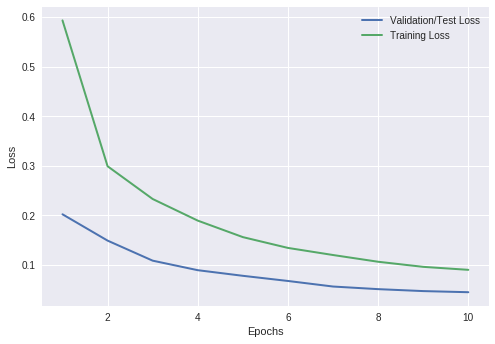

In [12]:
# Plotting the loss charts
import matplotlib.pyplot as plt

history_dict = history.history

training_loss_values = history_dict['loss']
validation_loss_values = history_dict['val_loss']
epochs = range(1, len(training_loss_values) + 1)

line1 = plt.plot(epochs, validation_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, training_loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

#### 2 - Accuracy Charts


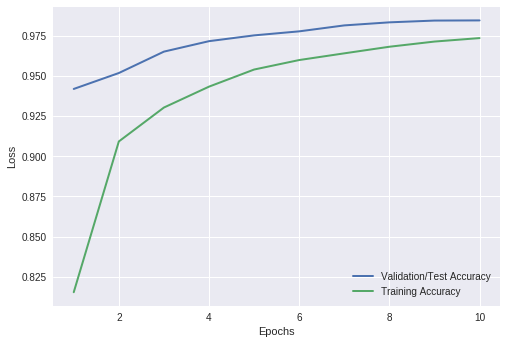

In [13]:
# Plotting the accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

training_acc_values = history_dict['acc']
validation_acc_values = history_dict['val_acc']
epochs = range(1, len(training_loss_values) + 1)

line1 = plt.plot(epochs, validation_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, training_acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

### Step 7A: saving the model

In [14]:
model.save('simple_mnist_cnn.h5')
print('Model saved')

Model saved


### Step 7B: loading the model

In [15]:
from keras.models import load_model

classifier = load_model('simple_mnist_cnn.h5')
print('Model loaded')
print(classifier.summary())

Model loaded
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0       

### Step 8: visualizing the model

#### Generating the diagram of the model architecture

Model Summary: 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0    

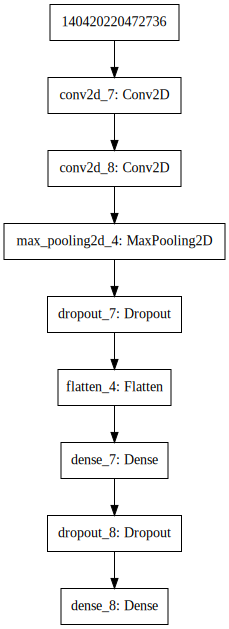

In [18]:
from keras import layers
from keras import models
from keras import optimizers
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

# Rebuilding the model

# Building the model
model = models.Sequential()

# Convolutional and Pooling layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
# Adding a classifier on top of the convnet (FC layers)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

          
# Compiling the model
model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.SGD(0.01), 
              metrics=['accuracy'])

print('Model Summary: ')
print(model.summary())

# Generating the plot
print('\n\nModel Architecture: ')
SVG(model_to_dot(model).create(prog='dot', format='svg'))